<h1 align="center">Lab 2 - Decision Tree</h1>

# 1. Student Information

- Student ID: 22127154
- Student Name: Nguyen Gia Huy
- Class: 22CLC06

# 2. Introduction

In this assignment, we are going to build a decision tree on the UCI Breast Cancer Wisconsin (Diagnostic) dataset, with support from the scikit-learn library.

The Breast Cancer Wisconsin (Diagnostic) dataset is used for classifying tumors as malignant or benign based on 30 numerical features derived from imaging data. It includes 569 samples, with labels indicating either malignant (M) or benign (B).

Download [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

# 3. Implementation


## 3.1 Importing Libraries and Setting Up the Environment

In this section, we will import the necessary libraries and set up the environment for the implementation.


In [144]:
# Install necessary libraries
%pip install ucimlrepo
%pip install scikit-learn
%pip install graphviz

# Import required libraries
from ucimlrepo import fetch_ucirepo  # type: ignore
from sklearn.model_selection import train_test_split  # type: ignore
from sklearn.tree import DecisionTreeClassifier  # type: ignore
from sklearn import tree  # type: ignore
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # type: ignore
import graphviz  # type: ignore
import os
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

# Configure the Graphviz path if needed
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 3.2 Loading and Preparing the Dataset

In this section, we will load the dataset and prepare it for the implementation.


In [145]:
# Fetch the dataset from the UCI ML repository
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extract features, labels, and headers
data = breast_cancer_wisconsin_diagnostic.data
features = data.features
labels = data.targets

## 3.3 Splitting the Dataset into Training and Testing Sets

In this section, we will split the dataset into training and testing sets.


In [146]:
# Define train-test split proportions
proportions = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
data_splits = []

# Split the dataset into training and testing sets based on the defined proportions
for train_size, test_size in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        labels,
        test_size=test_size,
        train_size=train_size,
        stratify=labels,
        random_state=42,
        shuffle=True,
    )
    data_splits.append((X_train, X_test, y_train, y_test))

## 3.4 Visualizing Class Distribution

In this section, we will visualize the class distribution of the dataset.


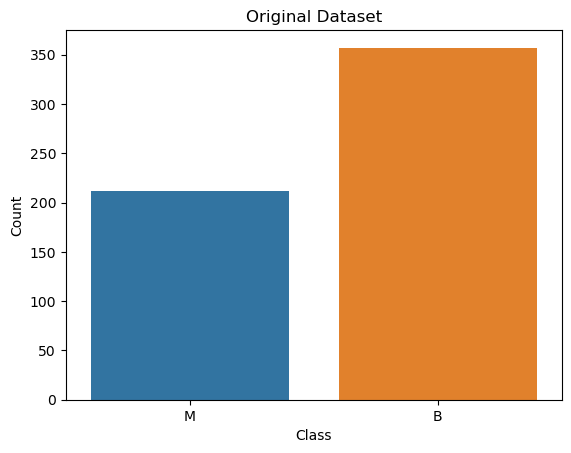

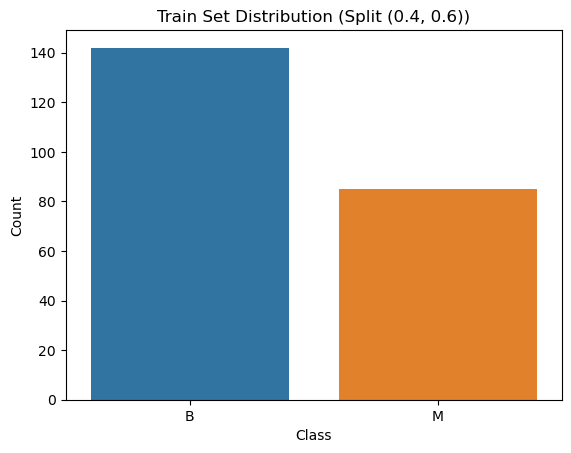

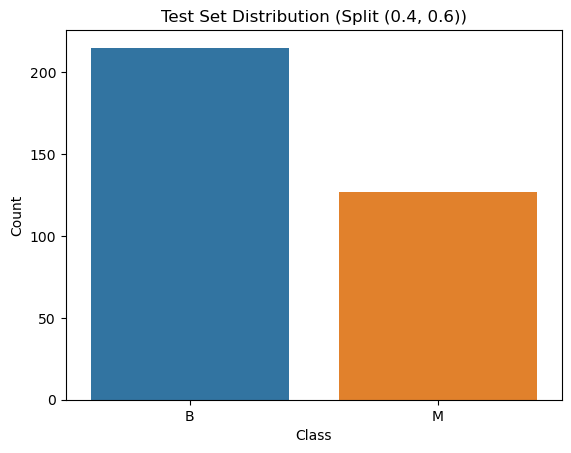

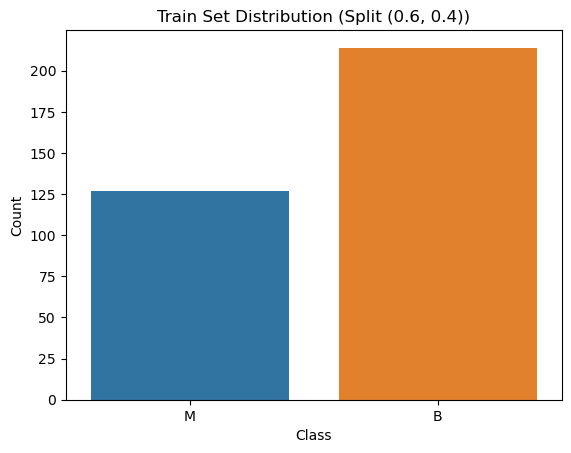

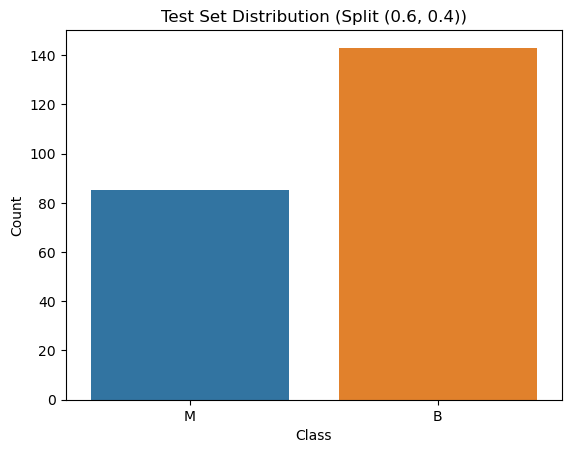

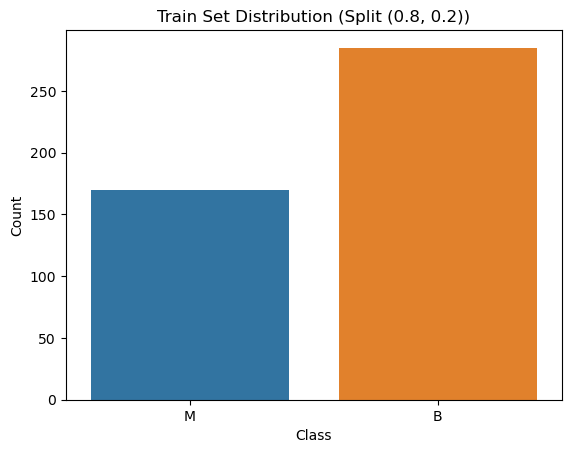

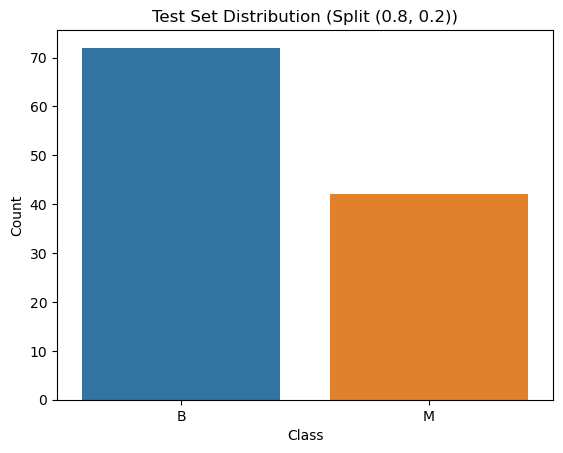

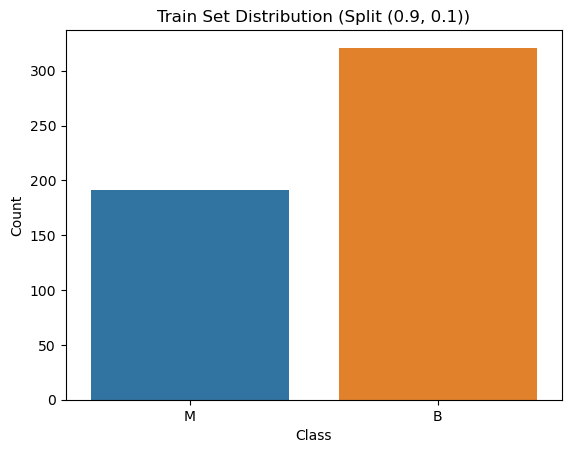

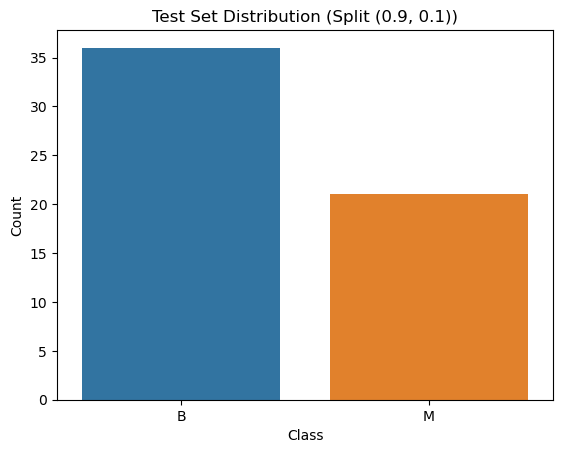

In [147]:
# Function to visualize class distribution
def plot_class_distribution(labels, title):
    if isinstance(labels, pd.DataFrame):
        labels = labels.iloc[
            :, 0
        ]  # Select the first column if labels are in a DataFrame
    elif isinstance(labels, np.ndarray) and labels.ndim > 1:
        labels = labels.ravel()  # Convert 2D array to 1D array

    sns.countplot(x=labels)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()


# Visualize the distribution in the original dataset
plot_class_distribution(labels, "Original Dataset")

# Visualize the distribution in each train/test split
for i, (X_train, X_test, y_train, y_test) in enumerate(data_splits):
    plot_class_distribution(y_train, f"Train Set Distribution (Split {proportions[i]})")
    plot_class_distribution(y_test, f"Test Set Distribution (Split {proportions[i]})")

## 3.5 Training the Decision Tree Classifier

In this section, we will train the decision tree classifier on the training set.


In [148]:
# Train Decision Tree classifiers on each train-test split
classifiers = []
for X_train, X_test, y_train, y_test in data_splits:
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    classifiers.append(clf)

## 3.6 Visualizing the Decision Trees

In this section, we will visualize the decision trees.


Decision tree for split 0: (0.4, 0.6)


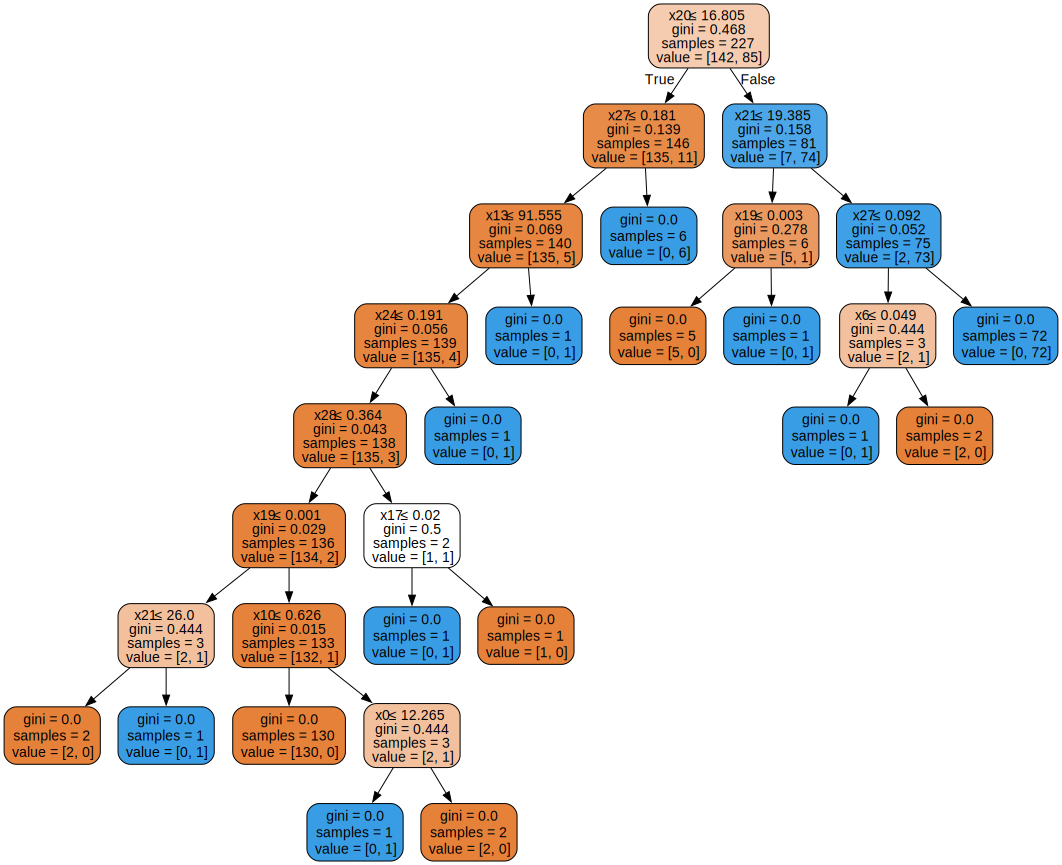

Decision tree for split 1: (0.6, 0.4)


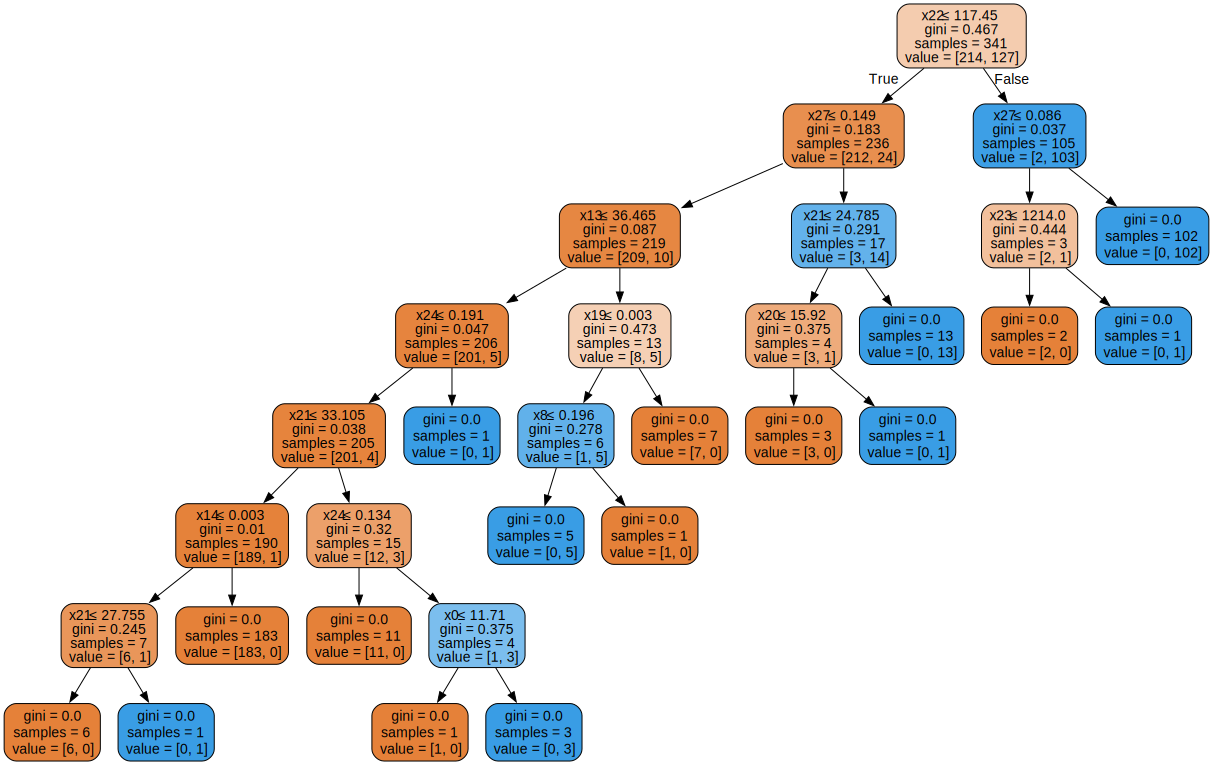

Decision tree for split 2: (0.8, 0.2)


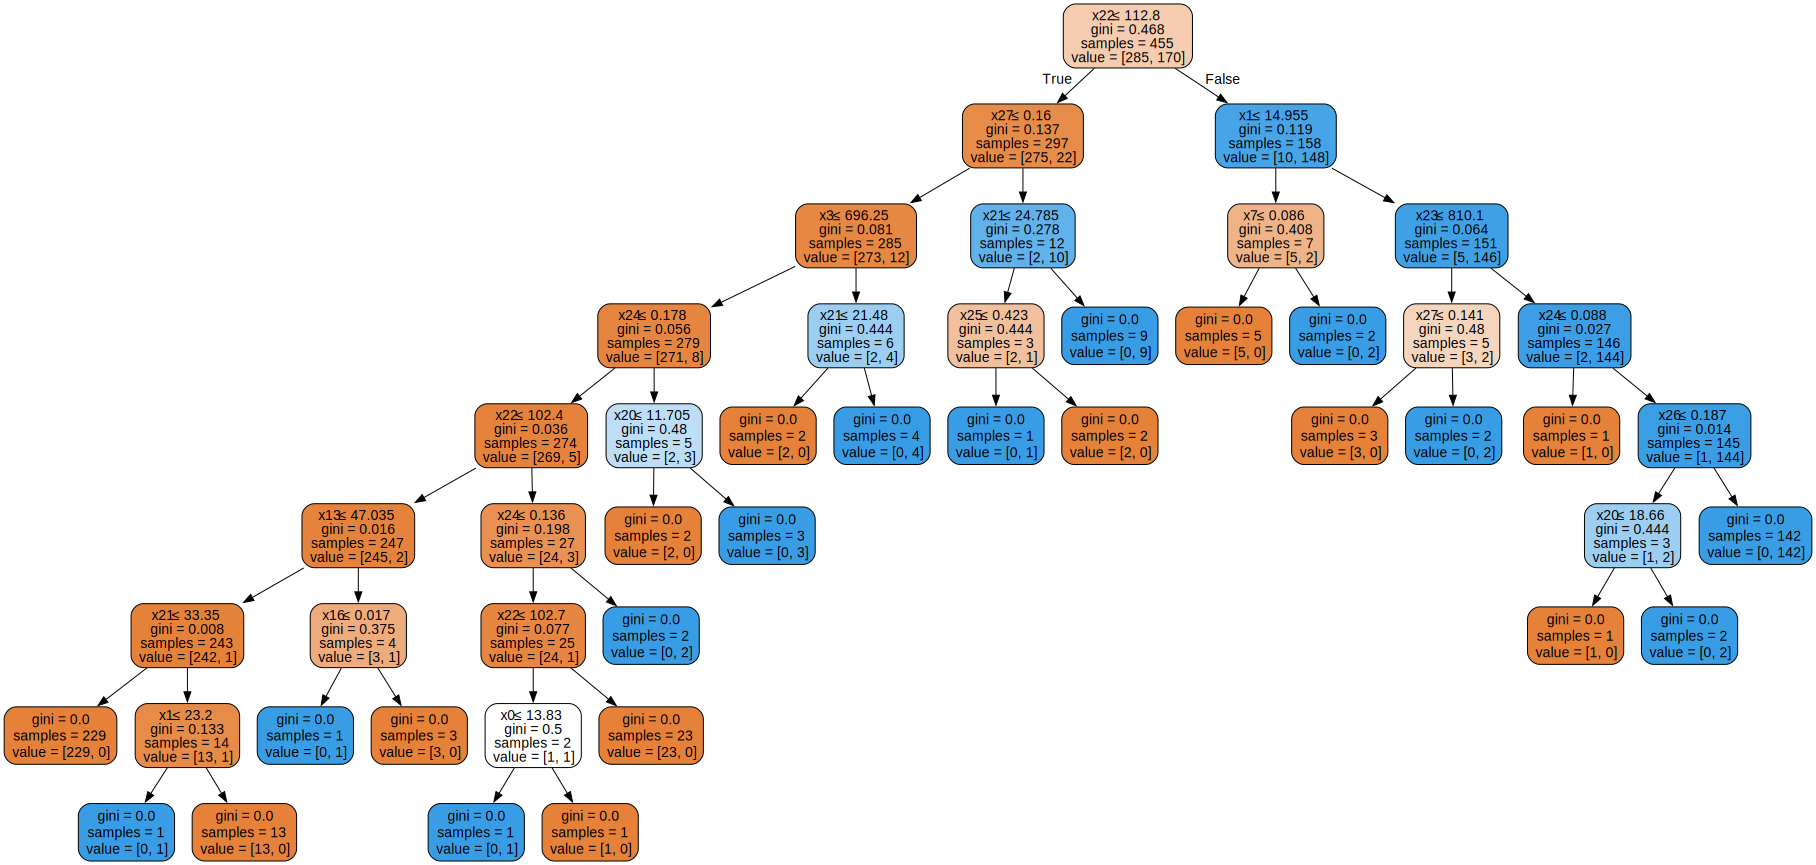

Decision tree for split 3: (0.9, 0.1)


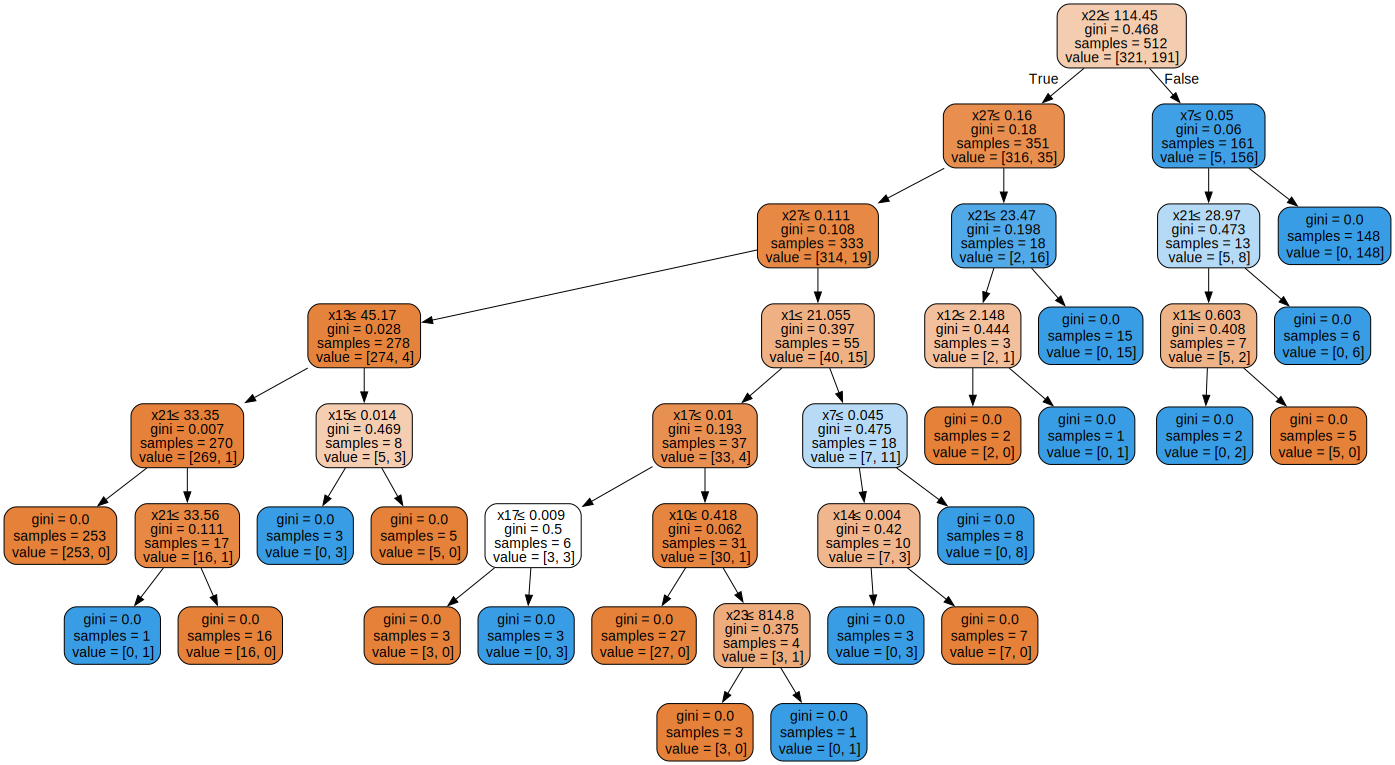

In [149]:
# Directory to save decision trees
output_dir = "decision_trees_split"
os.makedirs(output_dir, exist_ok=True)

# Export and visualize the decision trees for each train-test split
for i, clf in enumerate(classifiers):
    dot_path = os.path.join(
        output_dir, f"tree_split_{proportions[i][0]}_{proportions[i][1]}"
    )
    dot_data = tree.export_graphviz(
        clf, out_file=None, filled=True, rounded=True, special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render(dot_path, format="png", cleanup=True)
    print(f"Decision tree for split {i}: {proportions[i]}")
    display(graph)  # Display the decision tree

## 3.7 Evaluating the Classifier Performance

In this section, we will evaluate the performance of the classifier on the testing set.


Classification Report for split (0.4, 0.6)
              precision    recall  f1-score   support

           B       0.94      0.95      0.94       215
           M       0.91      0.89      0.90       127

    accuracy                           0.93       342
   macro avg       0.92      0.92      0.92       342
weighted avg       0.93      0.93      0.93       342



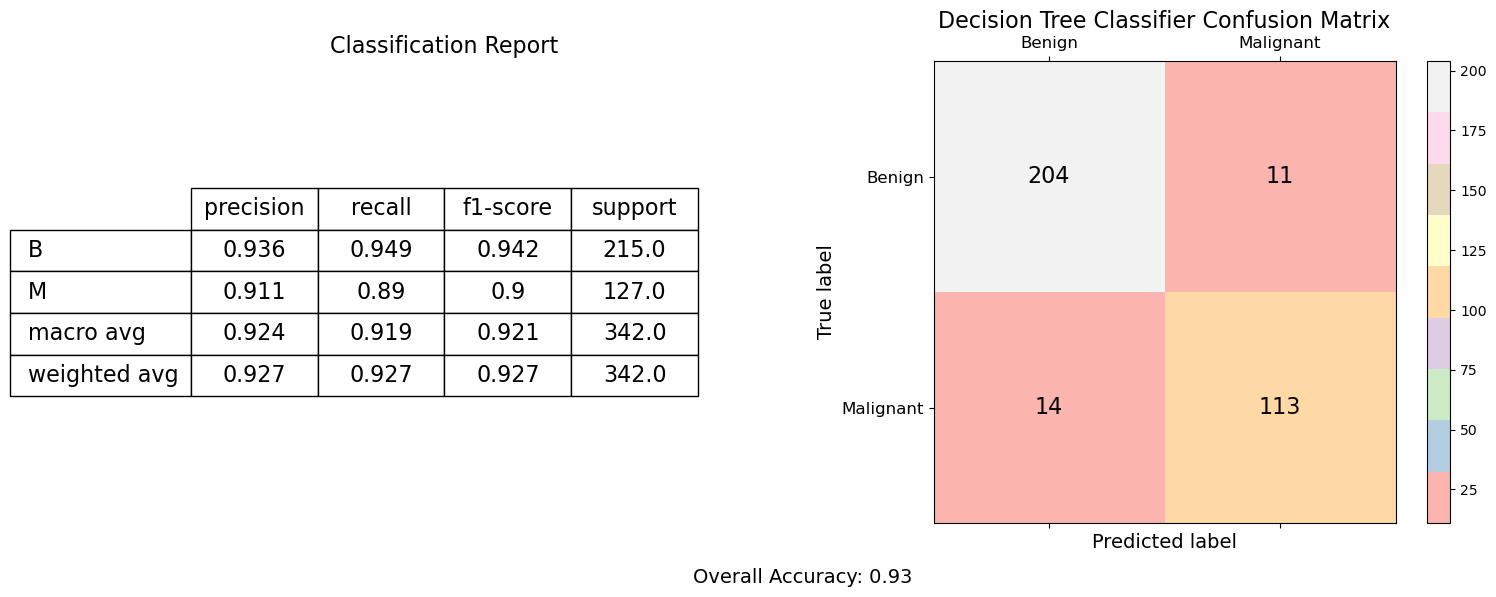

Classification Report for split (0.6, 0.4)
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       143
           M       0.96      0.91      0.93        85

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228



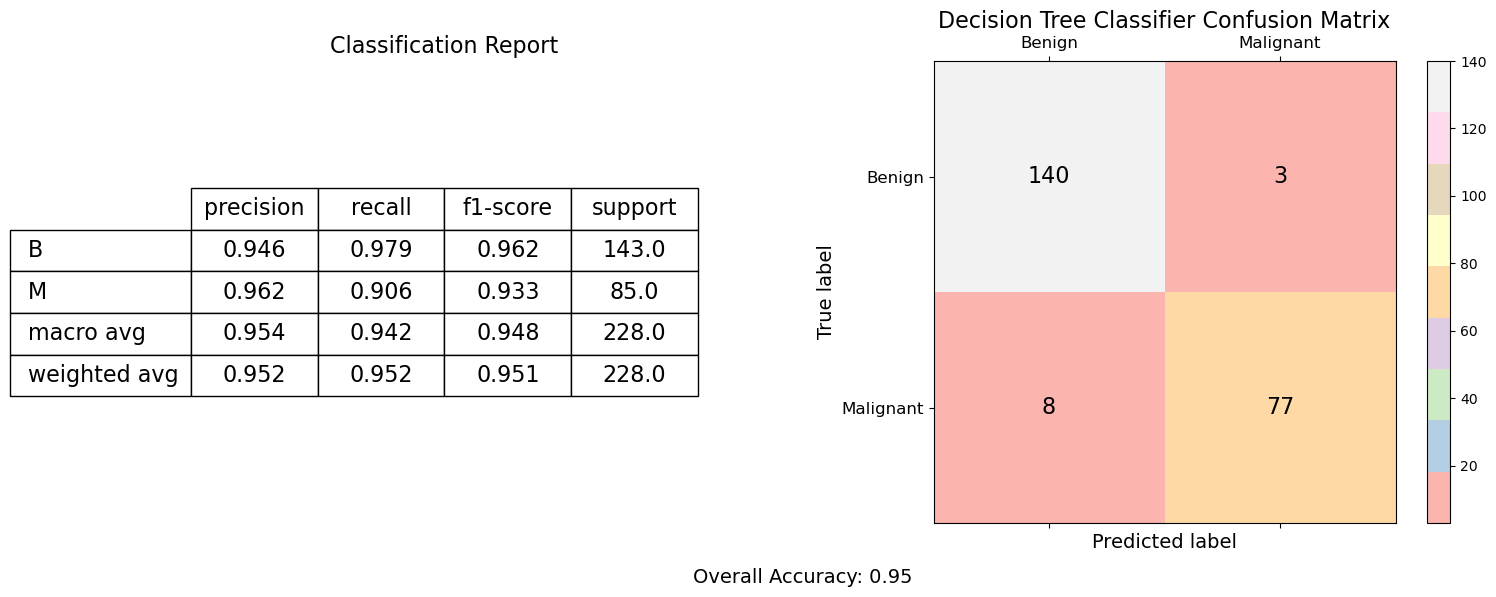

Classification Report for split (0.8, 0.2)
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        72
           M       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



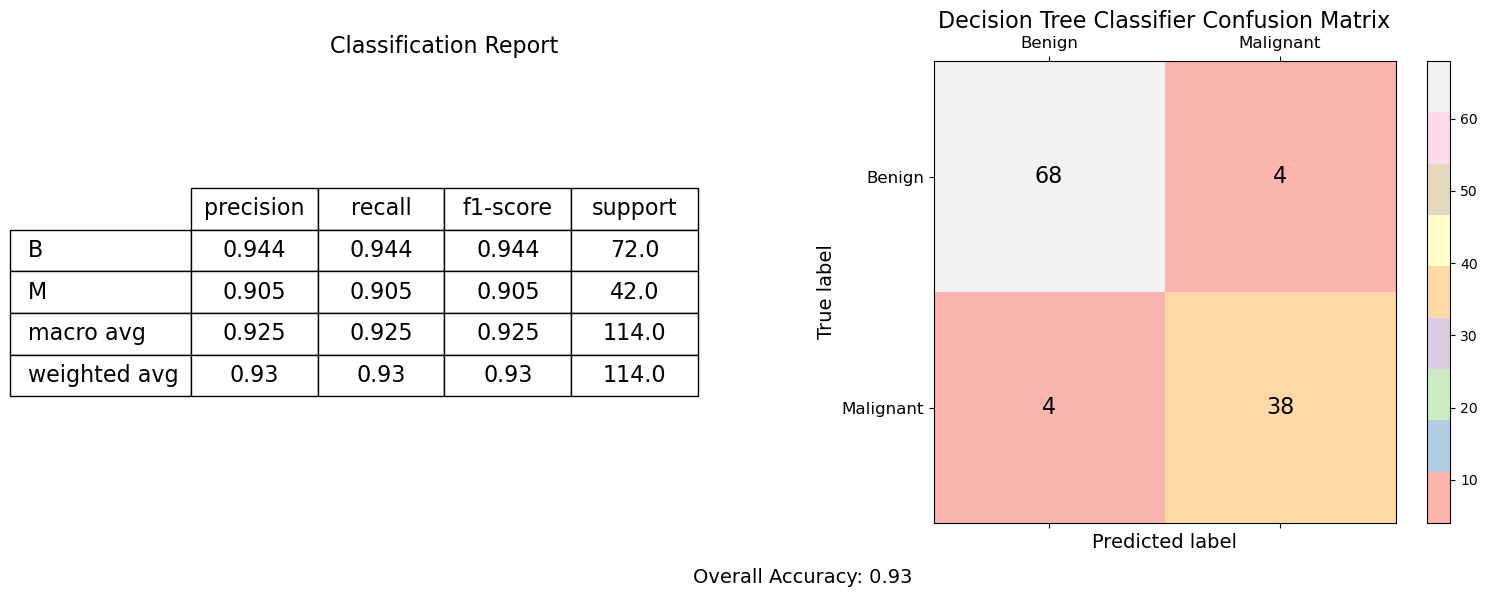

Classification Report for split (0.9, 0.1)
              precision    recall  f1-score   support

           B       0.92      0.97      0.95        36
           M       0.95      0.86      0.90        21

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



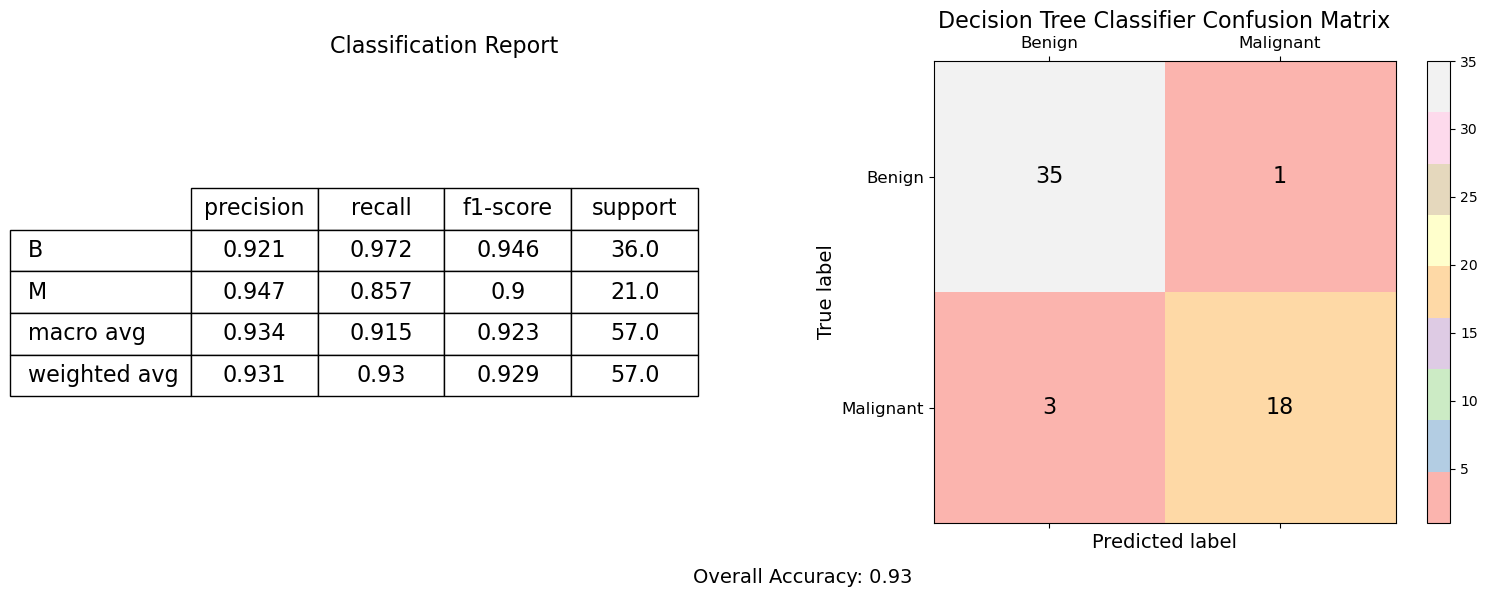

In [150]:
for i, (clf, (X_train, X_test, y_train, y_test)) in enumerate(
    zip(classifiers, data_splits)
):
    y_pred = clf.predict(X_test)

    # Get the classification report and confusion matrix
    report = classification_report(
        y_test, y_pred, output_dict=True
    )  # Get output as dict
    matrix = confusion_matrix(y_test, y_pred)

    # Print the classification report and confusion matrix
    print(f"Classification Report for split {proportions[i]}")
    print(classification_report(y_test, y_pred))  # Display the report as a string

    # Remove accuracy from the report dictionary
    report.pop("accuracy", None)

    # Convert classification report to DataFrame for easier display
    report_df = pd.DataFrame(report).transpose()

    # Reduce the number of decimal places in the classification report
    report_df = report_df.round(3)

    # Plot the confusion matrix and classification report
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Confusion Matrix using matshow
    cax = ax[1].matshow(matrix, cmap="Pastel1")
    plt.colorbar(cax, ax=ax[1])

    # Annotate each cell with the numeric value
    for (x, y), val in np.ndenumerate(matrix):
        ax[1].text(y, x, f"{val}", ha="center", va="center", color="black", fontsize=16)

    ax[1].set_title("Decision Tree Classifier Confusion Matrix", fontsize=16)
    ax[1].set_xlabel("Predicted label", fontsize=14)
    ax[1].set_ylabel("True label", fontsize=14)

    # Set ticks
    ax[1].set_xticks([0, 1])
    ax[1].set_yticks([0, 1])
    ax[1].set_xticklabels(["Benign", "Malignant"], fontsize=12)
    ax[1].set_yticklabels(["Benign", "Malignant"], fontsize=12)

    # Classification Report
    ax[0].axis("off")
    ax[0].axis("tight")
    table = ax[0].table(
        cellText=report_df.values,
        colLabels=report_df.columns,
        rowLabels=report_df.index,
        cellLoc="center",
        loc="center",
        colWidths=[0.2] * len(report_df.columns),
    )

    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.scale(1, 2.5)

    ax[0].set_title("Classification Report", fontsize=16)

    # Display overall accuracy separately
    plt.figtext(
        0.5,
        0.01,
        f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}",
        ha="center",
        fontsize=14,
    )

    plt.show()

## 3.8 Experimenting with Different Tree Depths

In this section, we will experiment with different tree depths to see how it affects the classifier's performance.


Decision tree for depth None


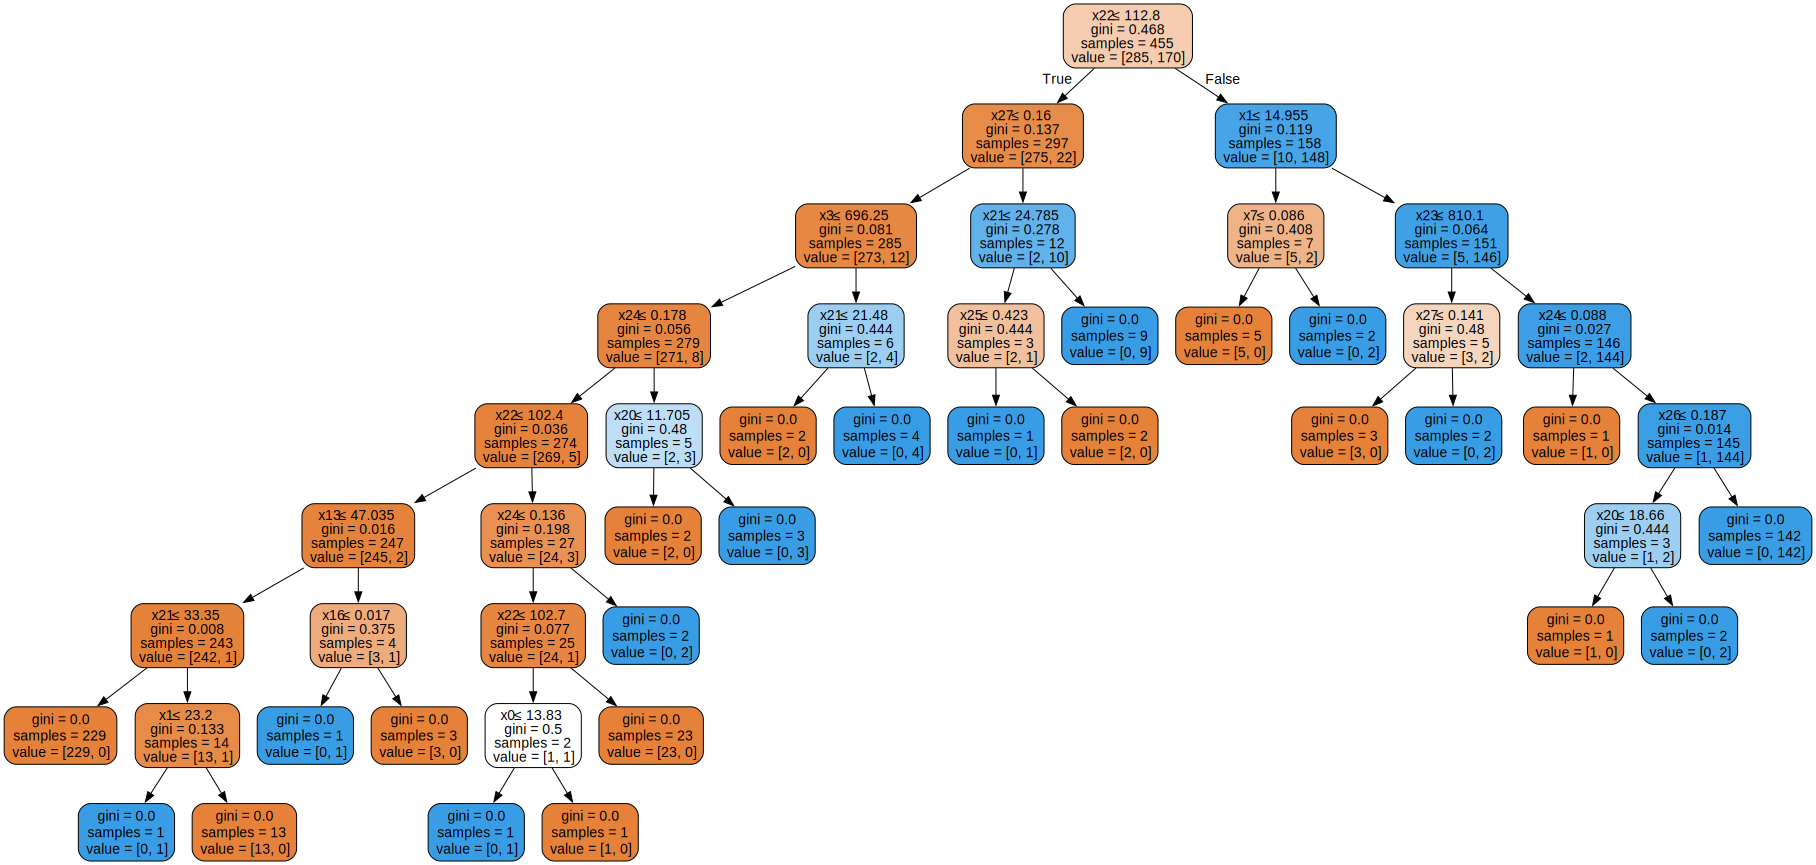

Decision tree for depth 2


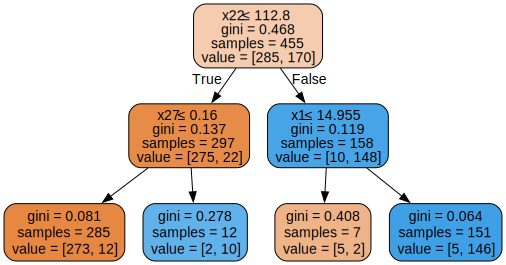

Decision tree for depth 3


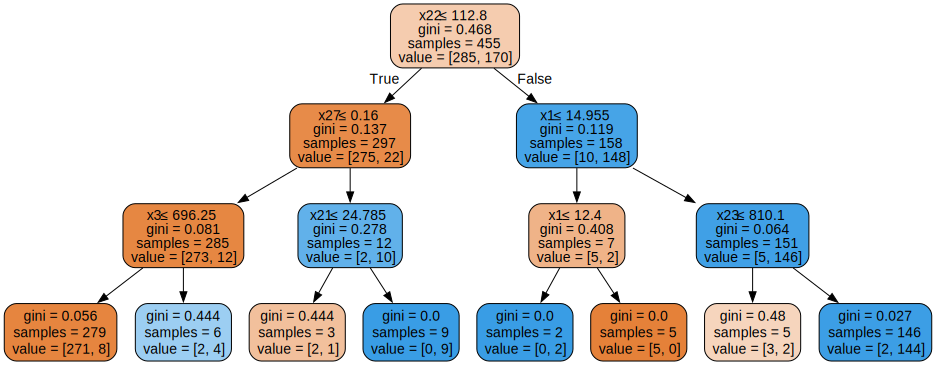

Decision tree for depth 4


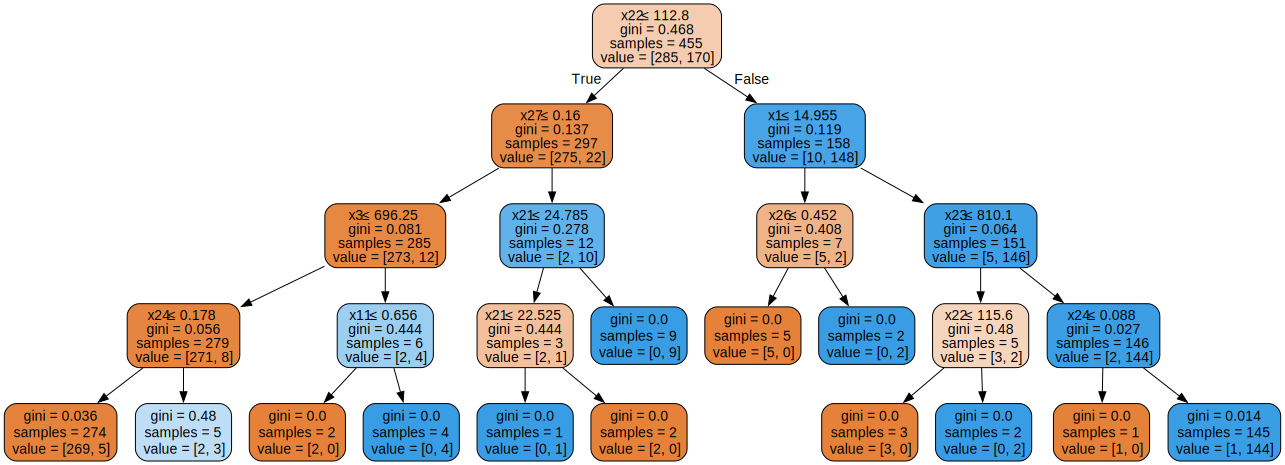

Decision tree for depth 5


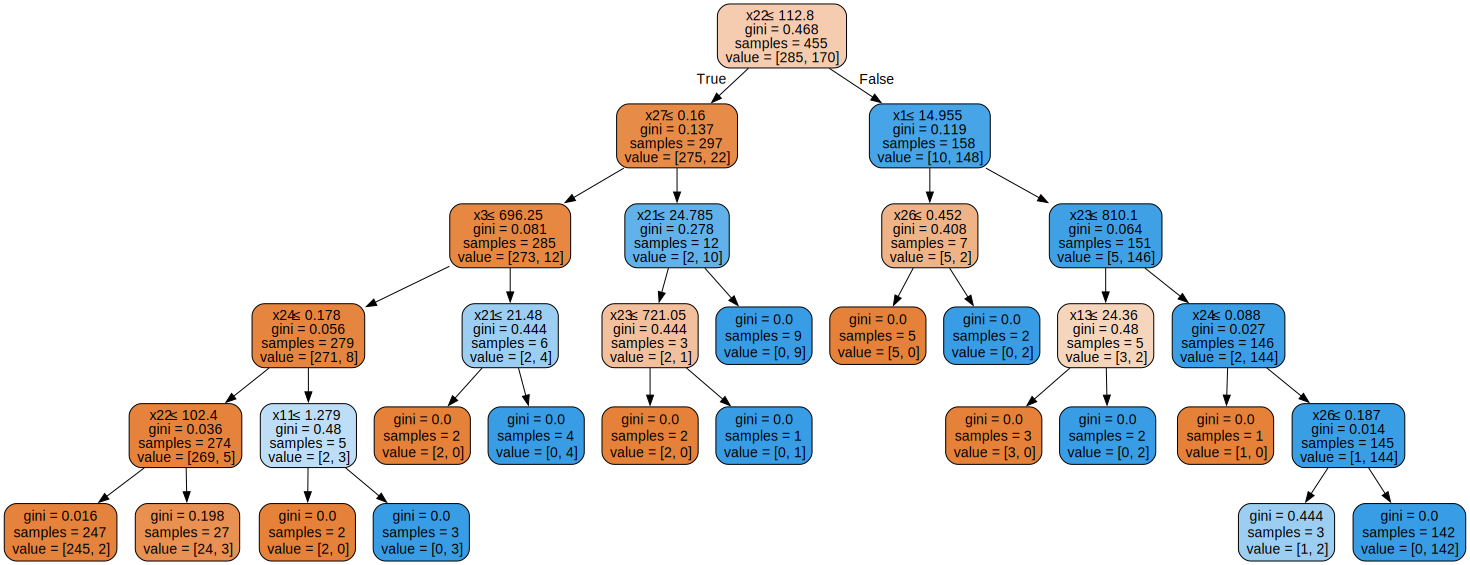

Decision tree for depth 6


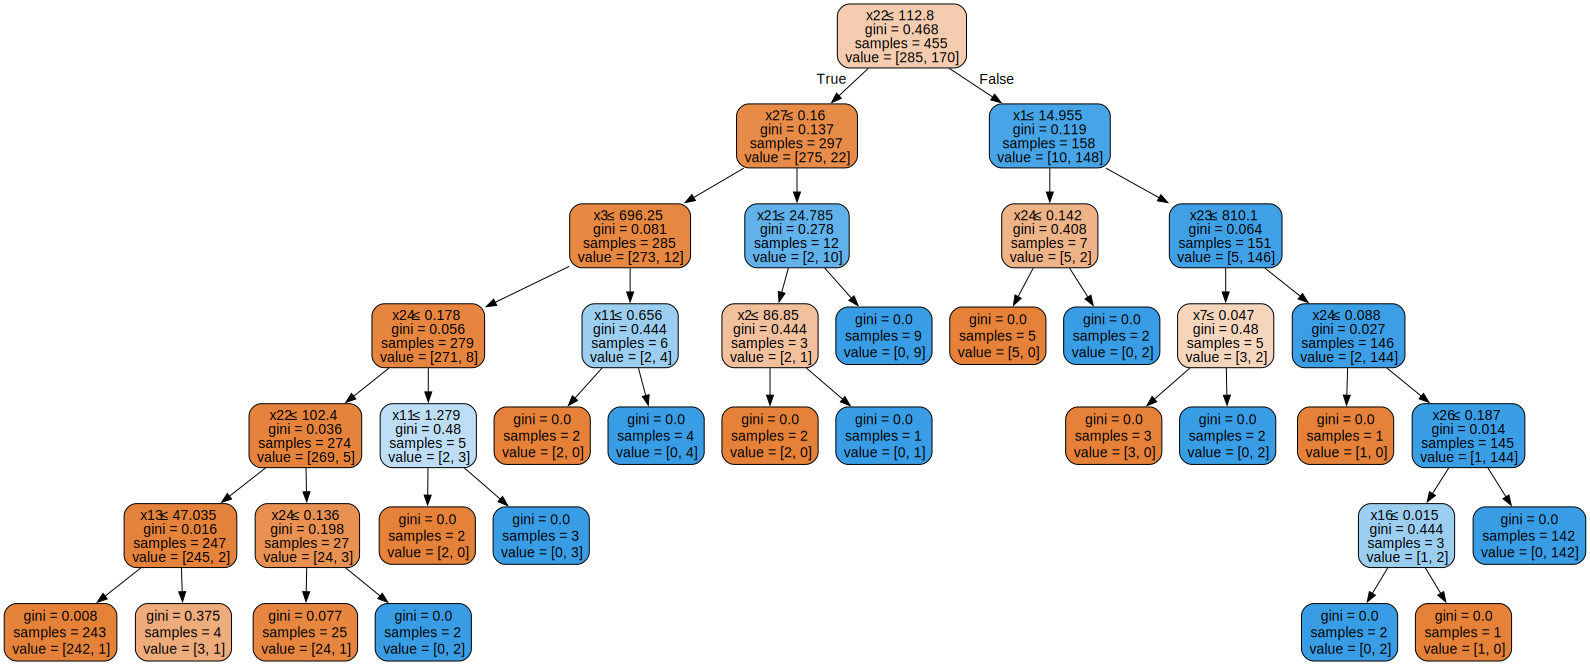

Decision tree for depth 7


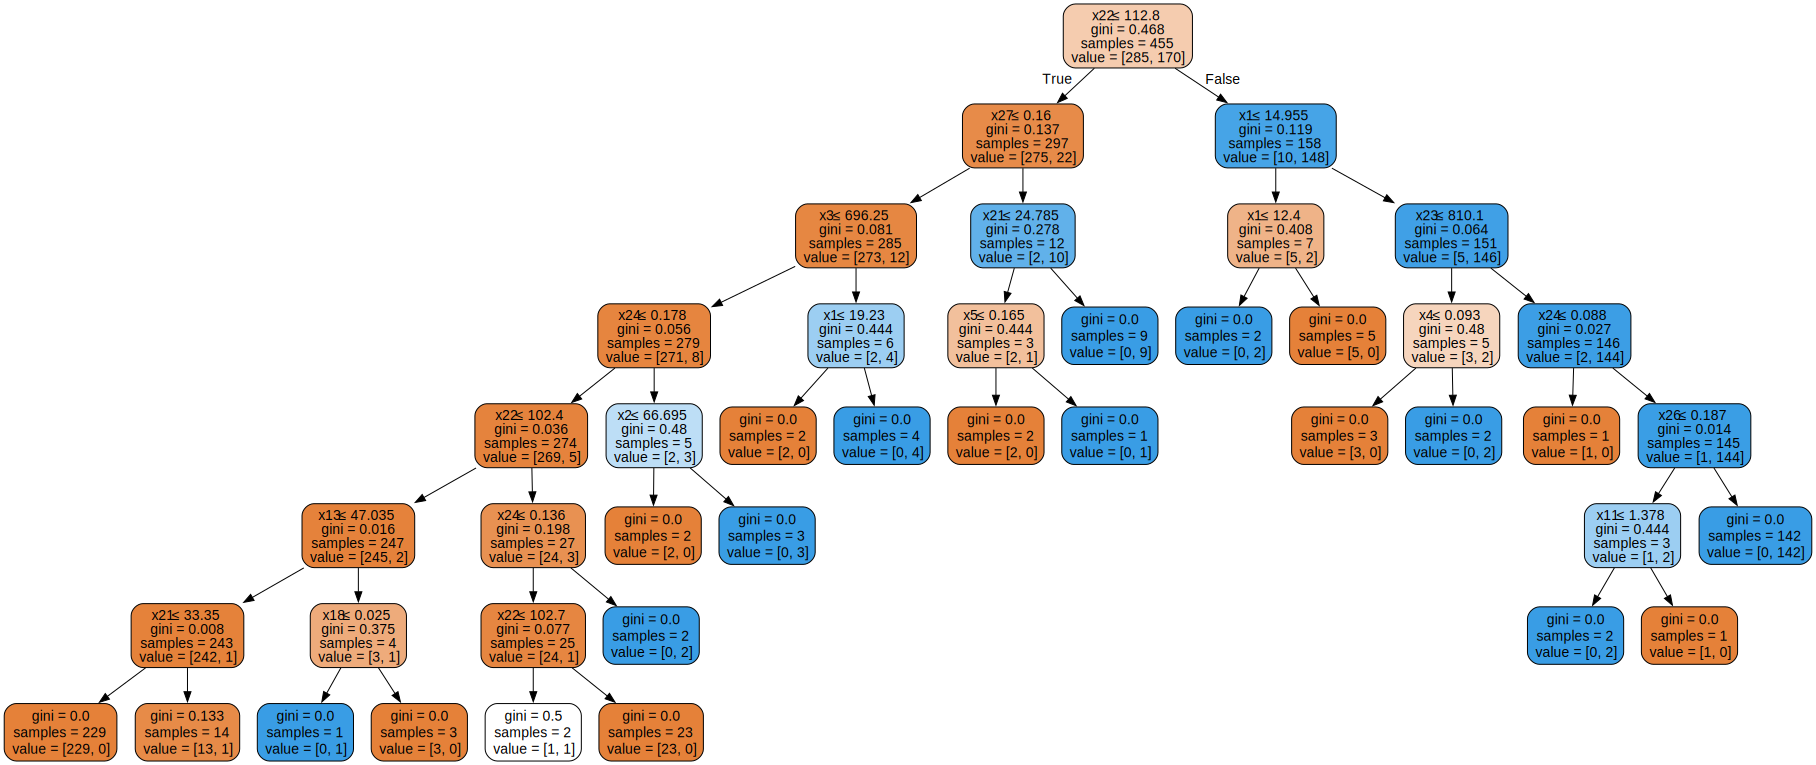

   Max Depth  Accuracy
0        NaN  0.929825
1        2.0  0.921053
2        3.0  0.903509
3        4.0  0.912281
4        5.0  0.921053
5        6.0  0.921053
6        7.0  0.938596


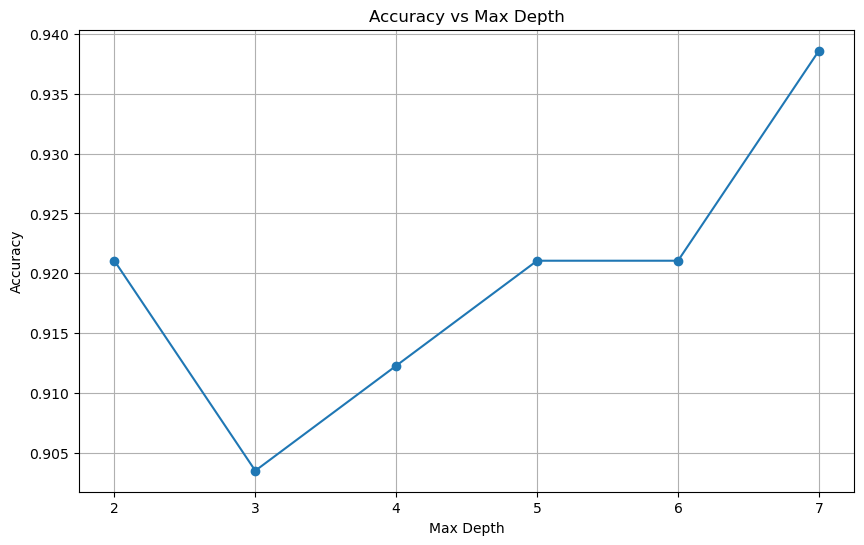

In [151]:
# Experiment with different tree depths and measure accuracy
depths = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores = []

# Directory to save decision trees with different depths
output_dir = "decision_trees_depth"
os.makedirs(output_dir, exist_ok=True)

for depth in depths:
    # Train a Decision Tree Classifier with a specified max depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(
        data_splits[2][0], data_splits[2][2]
    )  # Using the third data split (0.8/0.2)
    y_pred = clf.predict(data_splits[2][1])
    accuracy = accuracy_score(data_splits[2][3], y_pred)
    accuracy_scores.append(accuracy)

    dot_path = os.path.join(output_dir, f"tree_depth_{depth}")
    # Visualize the decision tree for the current depth
    dot_data = tree.export_graphviz(
        clf,
        out_file=None,
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = graphviz.Source(dot_data)
    graph.render(dot_path, format="png", cleanup=True)
    print(f"Decision tree for depth {depth}")
    display(graph)  # Display the decision tree

# Create a DataFrame to store max_depth and accuracy
df_accuracy = pd.DataFrame({"Max Depth": depths, "Accuracy": accuracy_scores})

# Display the table
print(df_accuracy)

# Plotting the accuracy as a function of max_depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.grid(True)
plt.show()